### Import & Notebook settings

In [29]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Notebook plotting and style
sns.set(style="whitegrid")
%matplotlib inline

### Check Working directory & availables files

In [6]:
print("Current working dir:", os.getcwd())
print("\nFiles here:", os.listdir('.')[:50])   # show up to 50 entries

# Common alternate path where some systems (or this environment) put uploads:
alt_path = '/mnt/data/train.csv'
print("\nExists 'train.csv' in current dir?", os.path.exists('train.csv'))
print("Exists at", alt_path, "?", os.path.exists(alt_path))

Current working dir: C:\Users\ezhil

Files here: [' Pandas Analysis.ipynb', '.anaconda', '.conda', '.condarc', '.continuum', '.dbclient', '.dotnet', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.nuget', '.spyder-py3', '.streamlit', '.templateengine', '.virtual_documents', '.vscode', 'anaconda3', 'app.py', 'app3.py', 'AppData', 'Application Data', 'cardio final.ipynb', 'cardio.ipynb', 'cardio_disease_model.pkl', 'churn_predictions_output.csv', 'cleaned_customer_personality.csv', 'Contacts', 'control flow stmt.ipynb', 'Cookies', 'Customer Churn Analysis.ipynb', 'customer personality .ipynb', 'Customer-Churn Data.csv', 'D3.csv', 'Data Manipulation using Numpy.ipynb', 'Data Merging.ipynb', 'Data visualization.ipynb', 'data.csv', 'Dataset.csv', 'Datatypes.ipynb', 'day 1 data science.ipynb', 'day6 mean median.ipynb', 'deepcopyb and shallow copy.ipynb', 'disease prediction.ipynb', 'Documents', 'Downloads', 'Favorites', 'Function.ipynb', 'intern.ipynb']

Exists 'tra

### Load train.csv with a fallback to seaborn's titanic (safe)

In [9]:
import pandas as pd

df = pd.read_csv(r"C:\Users\ezhil\OneDrive\Documents\Desktop\train.csv")

In [10]:
# Replace the path below if your file is somewhere else, e.g. r"D:\Datasets\Titanic\train.csv"
local_path = "train.csv"
alt_path = "/mnt/data/train.csv"

if os.path.exists(local_path):
    df = pd.read_csv(local_path)
elif os.path.exists(alt_path):
    df = pd.read_csv(alt_path)
else:
    # fallback to seaborn's small titanic dataset (columns differ slightly from Kaggle)
    import seaborn as sns
    df = sns.load_dataset('titanic')
    print("Loaded seaborn's titanic dataset as fallback. (Use your train.csv for full Kaggle columns.)")

print("Shape:", df.shape)
df.head()


Loaded seaborn's titanic dataset as fallback. (Use your train.csv for full Kaggle columns.)
Shape: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Quick inspection (.info, .describe, head)

In [11]:
# Basic checks
df.info()
display(df.describe(include='all').T)   # transpose for readability


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
sibsp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who,891,3,man,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Value counts for categorical columns

In [12]:
categorical_cols = df.select_dtypes(include=['object','category','bool']).columns.tolist()
print("Categorical columns:", categorical_cols)

for c in categorical_cols:
    print("\n--- Value counts for:", c, "---")
    print(df[c].value_counts(dropna=False).head(20))


Categorical columns: ['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

--- Value counts for: sex ---
sex
male      577
female    314
Name: count, dtype: int64

--- Value counts for: embarked ---
embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

--- Value counts for: class ---
class
Third     491
First     216
Second    184
Name: count, dtype: int64

--- Value counts for: who ---
who
man      537
woman    271
child     83
Name: count, dtype: int64

--- Value counts for: adult_male ---
adult_male
True     537
False    354
Name: count, dtype: int64

--- Value counts for: deck ---
deck
NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: count, dtype: int64

--- Value counts for: embark_town ---
embark_town
Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: count, dtype: int64

--- Value counts for: alive ---
alive
no     549
yes    342
Name: count

###  Missing values summary (counts + percent)

In [13]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({'missing_count': missing, 'missing_percent': missing_percent})
missing_df[missing_df['missing_count']>0]

,missing_count,missing_percent
deck,688,77.22
age,177,19.87
embarked,2,0.22
embark_town,2,0.22


### Univariate: numeric histograms

Numeric columns: ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']


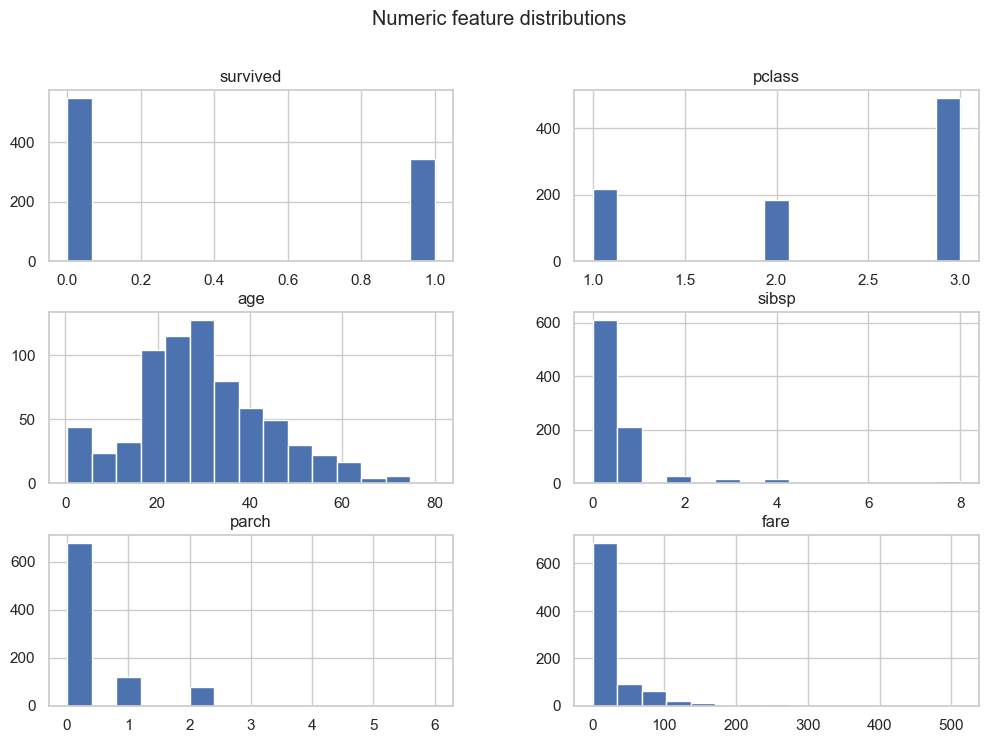

In [14]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", num_cols)

# Plot histograms for numeric features
df[num_cols].hist(bins=15, figsize=(12,8))
plt.suptitle('Numeric feature distributions')
plt.show()

### Univariate: categorical countplots

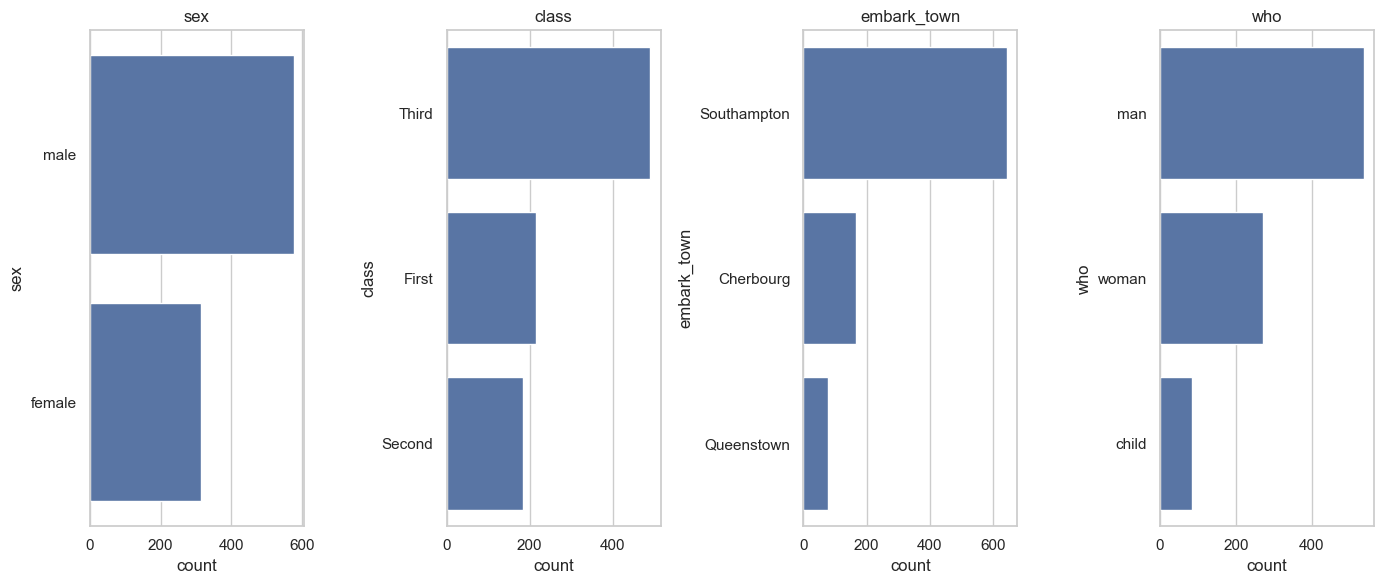

In [15]:
plt.figure(figsize=(14,6))
plot_cols = ['sex', 'class', 'embark_town', 'who']   # adjust based on your dataset columns
for i, col in enumerate(plot_cols):
    plt.subplot(1, len(plot_cols), i+1)
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(col)
plt.tight_layout()
plt.show()

### Bivariate: survival vs categories / numeric (bar + box)

Target column: survived


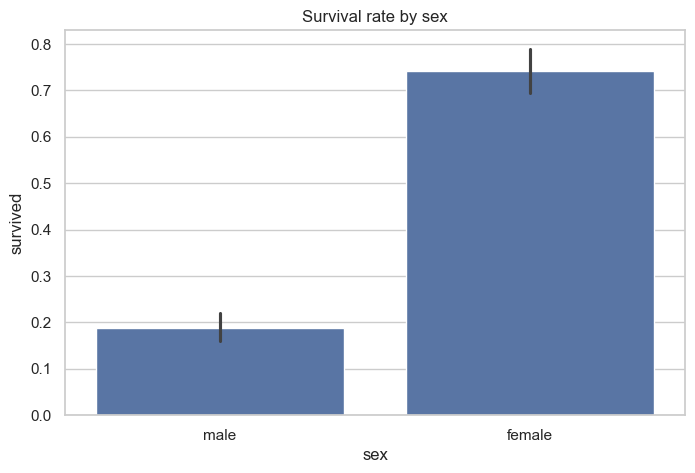

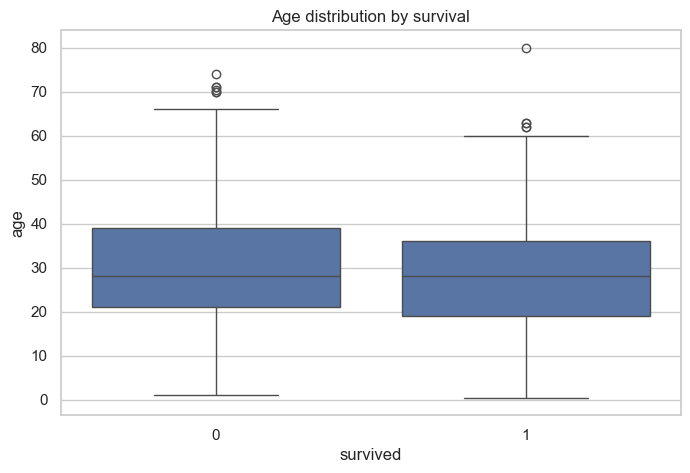

In [16]:
# Ensure 'survived' exists; if using seaborn fallback it exists, Kaggle train.csv has 'Survived' (capital S).
target_col = 'survived' if 'survived' in df.columns else ('Survived' if 'Survived' in df.columns else None)
print("Target column:", target_col)

if target_col:
    plt.figure(figsize=(8,5))
    sns.barplot(x='sex', y=target_col, data=df)
    plt.title('Survival rate by sex')
    plt.show()

    plt.figure(figsize=(8,5))
    sns.boxplot(x=target_col, y='age', data=df)
    plt.title('Age distribution by survival')
    plt.show()
else:
    print("No target column found. Use train.csv (Kaggle) which contains 'Survived'.")


###  Scatter: fare vs age colored by survival

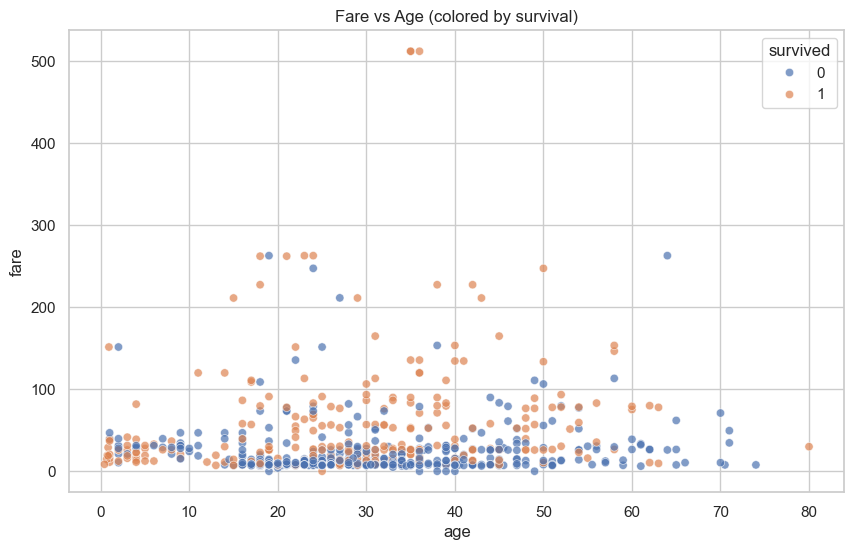

In [17]:
if 'fare' in df.columns and 'age' in df.columns and target_col:
    plt.figure(figsize=(10,6))
    sns.scatterplot(x='age', y='fare', hue=target_col, data=df, alpha=0.7)
    plt.title('Fare vs Age (colored by survival)')
    plt.show()
else:
    print("Columns for scatter plot missing (age/fare/target).")


### Correlation heatmap

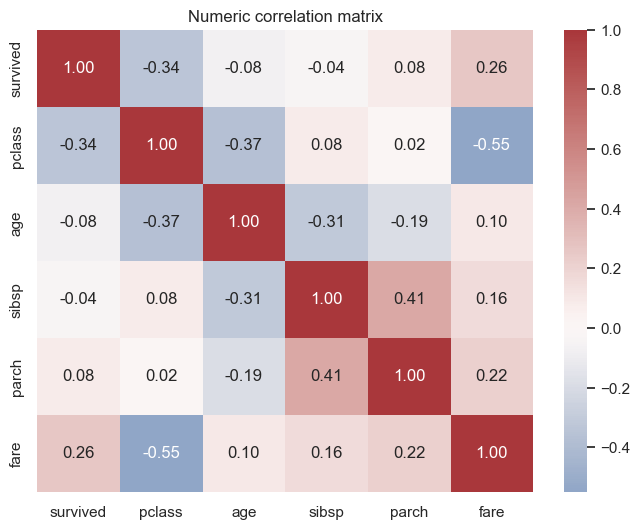

In [18]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(8,6))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", center=0, cmap='vlag')
plt.title('Numeric correlation matrix')
plt.show()

### Pairplot

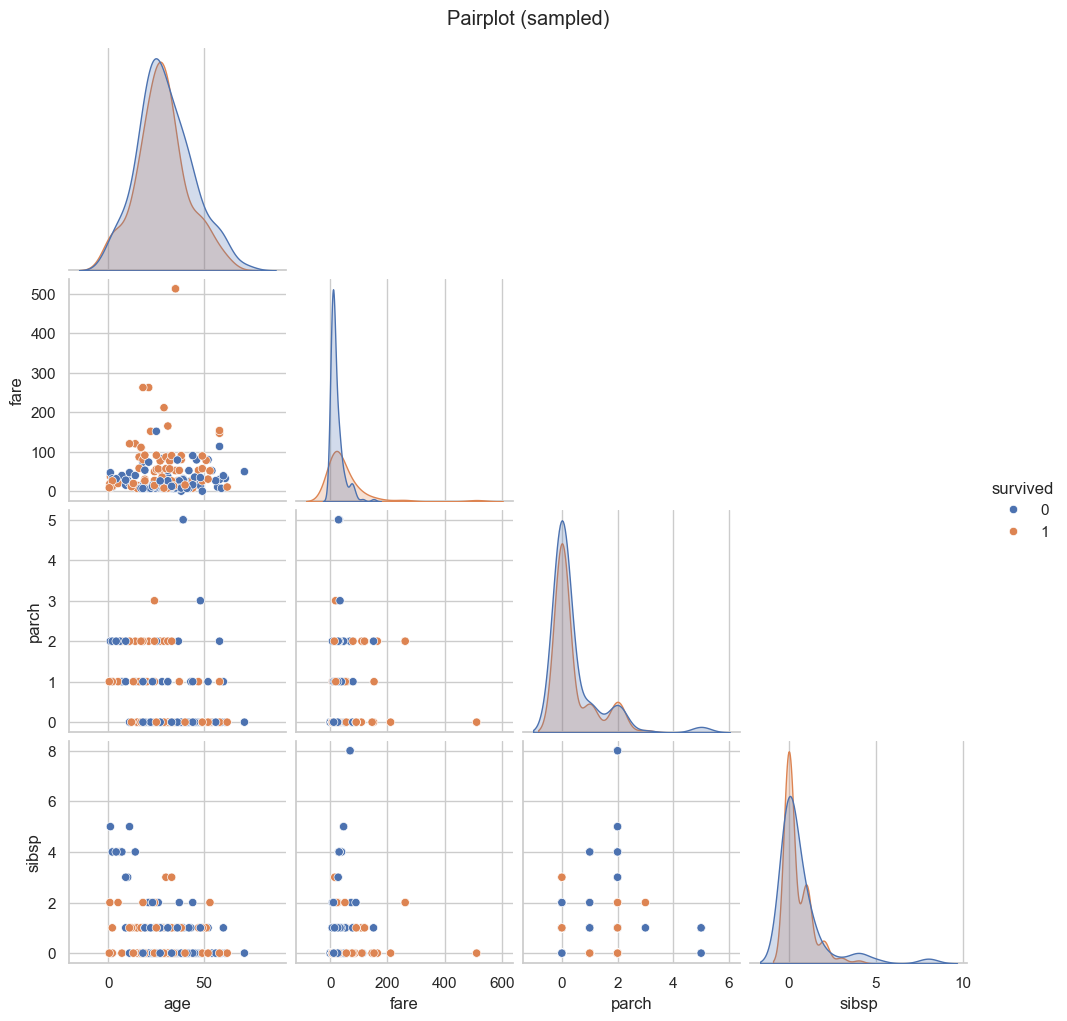

In [20]:
# sample to speed up pairplot; adjust vars to available numeric features
vars_to_plot = [c for c in ['age','fare','parch','sibsp'] if c in df.columns]
sample_frac = 0.3
if vars_to_plot and target_col:
    sample = df.sample(frac=sample_frac, random_state=1)
    sns.pairplot(sample, vars=vars_to_plot, hue=target_col, corner=True)
    plt.suptitle('Pairplot (sampled)', y=1.02)
    plt.show()
else:
    print("Pairplot skipped — check available columns and target.")

### Skewness & transform example

fare        4.787317
sibsp       3.695352
parch       2.749117
survived    0.478523
age         0.389108
pclass     -0.630548
dtype: float64

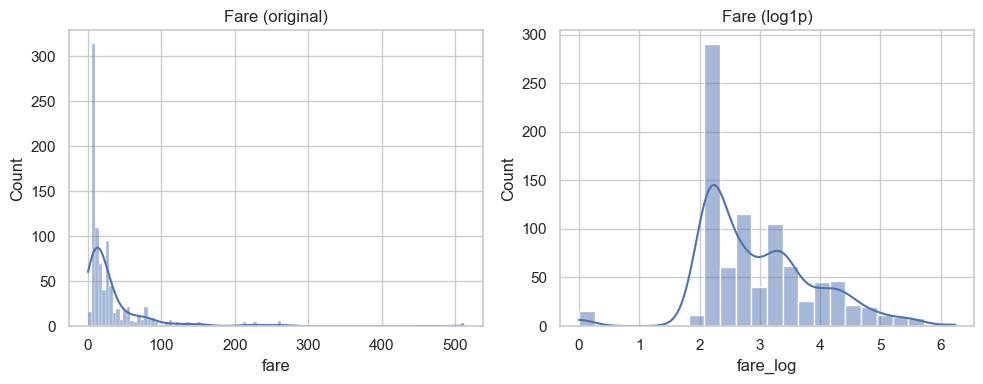

In [21]:
# compute skewness
numeric_skew = df.select_dtypes(include=[np.number]).skew().sort_values(ascending=False)
display(numeric_skew)

# transform fare if it exists
if 'fare' in df.columns:
    df['fare_log'] = np.log1p(df['fare'])
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(df['fare'].dropna(), kde=True)
    plt.title('Fare (original)')
    plt.subplot(1,2,2)
    sns.histplot(df['fare_log'].dropna(), kde=True)
    plt.title('Fare (log1p)')
    plt.tight_layout()
    plt.show()

### Missing value imputation examples

In [22]:
# Age median imputation
if 'age' in df.columns:
    df['age_median_imputed'] = df['age'].fillna(df['age'].median())

# Embark/embark_town mode imputation (adjust column name)
emb_col = 'embark_town' if 'embark_town' in df.columns else ('Embarked' if 'Embarked' in df.columns else None)
if emb_col:
    df[f'{emb_col}_mode_imputed'] = df[emb_col].fillna(df[emb_col].mode()[0])

# Quick check
df[['age','age_median_imputed']].head()

,age,age_median_imputed
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0


### Multicollinearity 

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# choose a few numeric columns and drop rows with NaNs for VIF calculation
vif_cols = [c for c in ['age','fare','parch','sibsp'] if c in df.columns]
vif_df = df[vif_cols].dropna()

if len(vif_cols) >= 2 and not vif_df.empty:
    X = vif_df.values
    vif_data = pd.DataFrame({'feature': vif_cols,
                             'VIF': [variance_inflation_factor(X, i) for i in range(X.shape[1])]})
    print(vif_data)
else:
    print("Not enough numeric columns with data for VIF calculation.")

  feature       VIF
0     age  1.434323
1    fare  1.535595
2   parch  1.483994
3   sibsp  1.438954


### Outlier detection

In [24]:
def iqr_outlier_bounds(series, k=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    return q1 - k*iqr, q3 + k*iqr

for col in ['age','fare']:
    if col in df.columns:
        low, high = iqr_outlier_bounds(df[col].dropna())
        count = ((df[col] < low) | (df[col] > high)).sum()
        print(f"{col}: bounds = ({low:.2f}, {high:.2f}), outliers = {count}")

age: bounds = (-6.69, 64.81), outliers = 11
fare: bounds = (-26.72, 65.63), outliers = 116


### Feature engineering suggestions

In [25]:
# Family size example (Kaggle columns sibsp + parch)
if all(c in df.columns for c in ['sibsp','parch']):
    df['family_size'] = df['sibsp'] + df['parch'] + 1
    display(df[['sibsp','parch','family_size']].head())

# Title extraction from name (if Kaggle 'Name' exists)
if 'Name' in df.columns:
    df['title'] = df['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)
    print(df['title'].value_counts().head(10))

,sibsp,parch,family_size
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


### Save cleaned sample

In [26]:
df_clean = df.copy()
out_name = "titanic_eda_sample_clean.csv"
df_clean.to_csv(out_name, index=False)
print("Saved:", out_name)


Saved: titanic_eda_sample_clean.csv


### Export notebook to PDF

In [27]:
# Run in terminal (not a python cell) or prefix with ! in notebook:
# jupyter nbconvert --to pdf your_notebook.ipynb
